/tmp/ipykernel_4776/9904541.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr['win_ratio'] = wr['W'] / (wr['W'] + wr['L'])
/tmp/ipykernel_4776/9904541.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr.drop(['W', 'L'], axis=1, inplace=True)
/tmp/ipykernel_4776/9904541.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


               variable  correlation
14   Earned Run Average    -0.514882
12         Runs Allowed    -0.491732
13  Earned Runs Allowed    -0.454757
21        Walks Allowed    -0.395994
19         Hits Allowed    -0.318127
23               Errors    -0.256000
20     Homeruns Allowed    -0.210863
24         Double Plays    -0.109621
7            Strikeouts    -0.066037
9       Caught Stealing    -0.049107
1                At Bat     0.042857
4               Triples     0.049805
18         Outs Pitched     0.061867
10         Hit by Pitch     0.093367
15       Complete Games     0.094356
8          Stolen Bases     0.132240
22   Strikeouts Allowed     0.157198
3               Doubles     0.191187
2                  Hits     0.254689
11      Sacrifice Flies     0.287266
25  Fielding Percentage     0.289945
5              Homeruns     0.290849
6                 Walks     0.347753
16             Shutouts     0.426729
0                  Runs     0.451943
17                Saves     0.479785



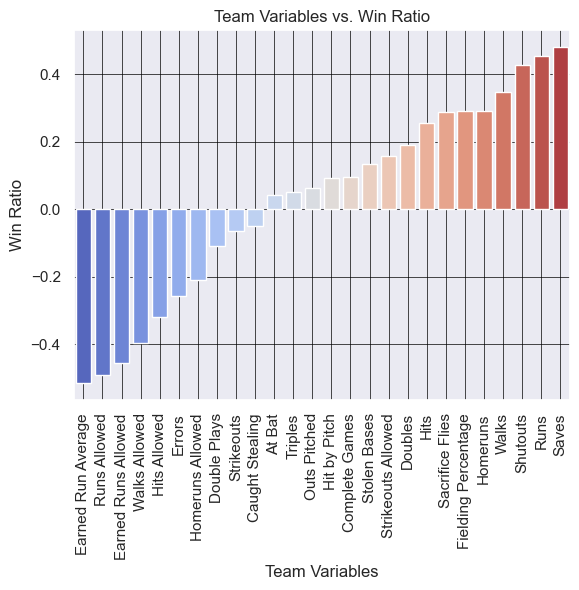

In [11]:
import statistics
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.lines import Line2D

df = pd.read_csv('baseball/core/Teams.csv')
# print(df.columns)

""" 
Analysis 
Out of all the team variables, which 
variable was the strongest at predicting a winning team?
"""

# Runs scored (R), At Bat (AB), Hits (H), Doubles (2B), Triples (3B), Homeruns (HR)
# Walks (BB), Strikeouts (SO), Stolen Bases (SB), Caught Stealing (CS), Hit by Pitch (HBP)
# Sacrifice Flies (SF), Runs Allowed (RA), Earned Runs Allowed (ER), Earned Run Average (ERA)
# Complete Games (CG), Shutouts (SHO), Saves (SV), Outs Pitched (IPouts), Hits Allowed (HA)
# Homeruns Allowed (HRA), Walks Allowed (BBA), Strikeouts Allowed (SOA), Errors (E), Double Plays (DP)
# Fielding Percentage (FP)
variables = ['yearID', 'teamID', 'R', 'AB', 'H', '2B', '3B', 'HR', 
             'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG',
             'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP']

baseballTranslation = {'yearID': 'Year', 'teamID': 'Team', 'R': 'Runs', 'AB': 'At Bat', 'H': 'Hits', '2B': 'Doubles', '3B': 'Triples', 'HR': 'Homeruns',
                       'BB': 'Walks', 'SO': 'Strikeouts', 'SB': 'Stolen Bases', 'CS': 'Caught Stealing', 'HBP': 'Hit by Pitch', 'SF': 'Sacrifice Flies',
                       'RA': 'Runs Allowed', 'ER': 'Earned Runs Allowed', 'ERA': 'Earned Run Average', 'CG': 'Complete Games', 'SHO': 'Shutouts', 'SV': 'Saves',
                       'IPouts': 'Outs Pitched', 'HA': 'Hits Allowed', 'HRA': 'Homeruns Allowed', 'BBA': 'Walks Allowed', 'SOA': 'Strikeouts Allowed',
                       'E': 'Errors', 'DP': 'Double Plays', 'FP': 'Fielding Percentage'}


# calculate win ratio, group by teamID. wr=win_ratio
wr = df[['yearID', 'teamID', 'W', 'L']]
wr['win_ratio'] = wr['W'] / (wr['W'] + wr['L'])
wr.drop(['W', 'L'], axis=1, inplace=True)
wr.groupby('teamID').mean()
# print(wr.head(10))

"""calculate stolen base ratio, group by teamID. 
sb=stolen_bases """
winningVars = df[variables]
merge = pd.merge(wr, winningVars, how='inner', on=['yearID', 'teamID'])
merge.dropna(inplace=True)

"""z-score standardize both win_ratio and stolen_base_ratio"""
merge['win_ratio'] = (merge['win_ratio'] - merge['win_ratio'].mean()) / merge['win_ratio'].std()
for var in variables[2:]:
    merge[var] = (merge[var] - merge[var].mean()) / merge[var].std()

""" For each variable, calculate the correlation with win_ratio """
corrStats = baseballTranslation.copy()
dicts2 = {}
for var in variables[2:]:
      corrStats[var] = merge['win_ratio'].corr(merge[var])
      dicts2[baseballTranslation[var]] = merge['win_ratio'].corr(merge[var])

# convert corrStats to dataframe
df = pd.DataFrame(list(dicts2.items()), columns=['variable', 'correlation'])
df.sort_values(by='correlation', inplace=True)
print(df)

# plot
sns.set(style='darkgrid')
custom_palette = sns.color_palette("coolwarm", len(df))
sns.barplot(
            data = df,
            x='variable',
            y='correlation', 
            palette=custom_palette
            )

plt.xlabel('Team Variables')
plt.ylabel('Win Ratio')
plt.xticks(rotation=90)
plt.grid(axis='both', linestyle='-', linewidth='0.5', color='black')
plt.title('Team Variables vs. Win Ratio')


print("""
    Strong Positive Correlations:
        Runs (0.4519): As expected, the number of runs scored has a positive correlation with the win ratio. 
        Saves (0.4798): Successful relief pitching and closing out games contribute to victories.
        Shutouts (0.4267): This indicates the importance of strong pitching performances in preventing the opposing team from scoring.

    Moderate Positive Correlations:
        Earned Run Average (ERA) (-0.5149): Interestingly, 
            the negative correlation with ERA indicates that a lower 
            ERA is associated with a higher win ratio. Good pitching, as 
            reflected in a lower ERA, is crucial for success.
        Fielding Percentage (0.2899): While not extremely strong, the positive correlation with 
            fielding percentage suggests that better fielding performance is associated with a 
            higher win ratio. Avoiding errors and making defensive plays contribute to team success.

    Weaker Correlations:
        Hits Allowed (-0.3181): A negative correlation suggests that teams allowing fewer 
            hits have a higher win ratio. This emphasizes the importance of strong pitching and defense.
        Walks Allowed (-0.3960): The negative correlation indicates that teams allowing 
            fewer walks tend to have a higher win ratio. Control on the mound is associated with success.
        Errors (-0.2560): The negative correlation with errors suggests that teams 
            making fewer defensive errors tend to have a higher win ratio. Defensive reliability is important.
""")


